Epoch 1/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1416 - accuracy: 0.9562 - val_loss: 0.0393 - val_accuracy: 0.9872
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0467 - accuracy: 0.9856 - val_loss: 0.0376 - val_accuracy: 0.9880
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0322 - accuracy: 0.9898 - val_loss: 0.0319 - val_accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0241 - accuracy: 0.9920 - val_loss: 0.0287 - val_accuracy: 0.9902
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0174 - accuracy: 0.9942 - val_loss: 0.0294 - val_accuracy: 0.9905
313/313 - 2s - loss: 0.0294 - accuracy: 0.9905 - 2s/epoch - 6ms/step

Test Accuracy: 0.9904999732971191
313/313 [==============================] - 2s 7ms/step


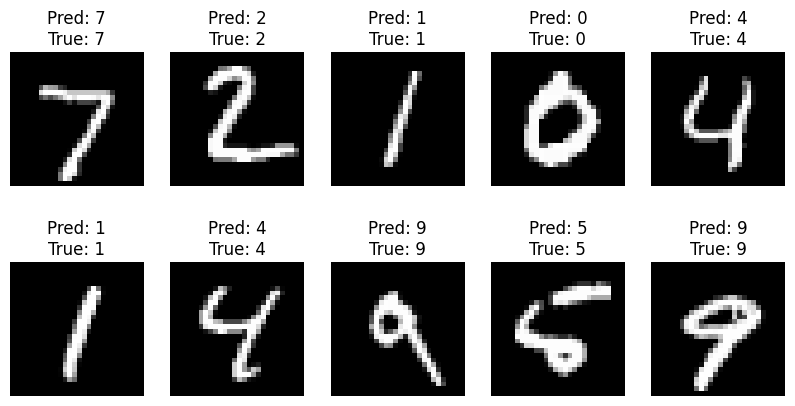

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Step 2: Preprocess the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

# Step 3: One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Step 4: Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_test, y_test))

# Step 7: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest Accuracy:", test_acc)

# Step 8: Display a few predictions
predictions = model.predict(x_test)

# Visualizing few predictions
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {predictions[i].argmax()}\nTrue: {y_test[i].argmax()}")
    plt.axis('off')
plt.show()
